In [559]:
import requests
import pandas as pd
import json
import pprint
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [560]:
#'get' function returns a response object
response = requests.get('https://api.nasa.gov/neo/rest/v1/neo/3542519?api_key=6Vfn5XgF2GfENKhGyta7aTPyQsfgDp45ppLDfWzw')

    #response.content used to access data in raw bytes format.
    #response.text: used to access data in String format.
    #response.json() used to access data in the JSON serialized format.

data_json = response.json()
#Use pretty printer library to see nested data
pprint.pprint(data_json)

{'absolute_magnitude_h': 21.8,
 'close_approach_data': [{'close_approach_date': '1900-06-01',
                          'close_approach_date_full': '1900-Jun-01 16:40',
                          'epoch_date_close_approach': -2195882400000,
                          'miss_distance': {'astronomical': '0.0445449038',
                                            'kilometers': '6663822.727834906',
                                            'lunar': '17.3279675782',
                                            'miles': '4140707.4359214628'},
                          'orbiting_body': 'Merc',
                          'relative_velocity': {'kilometers_per_hour': '111371.1395207566',
                                                'kilometers_per_second': '30.9364276447',
                                                'miles_per_hour': '69201.6949983279'}},
                         {'close_approach_date': '1900-07-07',
                          'close_approach_date_full': '1900-Jul-07 22:08',


                          'epoch_date_close_approach': -420755760000,
                          'miss_distance': {'astronomical': '0.2307059494',
                                            'kilometers': '34513118.626567778',
                                            'lunar': '89.7446143166',
                                            'miles': '21445457.4754722164'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '80517.7633274194',
                                                'kilometers_per_second': '22.3660453687',
                                                'miles_per_hour': '50030.6068853068'}},
                         {'close_approach_date': '1957-07-29',
                          'close_approach_date_full': '1957-Jul-29 03:29',
                          'epoch_date_close_approach': -392157060000,
                          'miss_distance': {'astronomical': '0.0738071101',
                      

                          'miss_distance': {'astronomical': '0.061653493',
                                            'kilometers': '9223231.23085991',
                                            'lunar': '23.983208777',
                                            'miles': '5731050.134530358'},
                          'orbiting_body': 'Merc',
                          'relative_velocity': {'kilometers_per_hour': '103159.4305842763',
                                                'kilometers_per_second': '28.6553973845',
                                                'miles_per_hour': '64099.2584094355'}},
                         {'close_approach_date': '2001-08-06',
                          'close_approach_date_full': '2001-Aug-06 07:55',
                          'epoch_date_close_approach': 997084500000,
                          'miss_distance': {'astronomical': '0.12658684',
                                            'kilometers': '18937121.6340308',
                       

                          'epoch_date_close_approach': 2542630260000,
                          'miss_distance': {'astronomical': '0.0585971986',
                                            'kilometers': '8766016.098526982',
                                            'lunar': '22.7943102554',
                                            'miles': '5446949.8252050716'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '55688.9734688591',
                                                'kilometers_per_second': '15.4691592969',
                                                'miles_per_hour': '34602.9624312475'}},
                         {'close_approach_date': '2051-07-20',
                          'close_approach_date_full': '2051-Jul-20 08:50',
                          'epoch_date_close_approach': 2573455800000,
                          'miss_distance': {'astronomical': '0.0923954416',
                        

                                                'kilometers_per_second': '21.5315508876',
                                                'miles_per_hour': '48163.9261804434'}},
                         {'close_approach_date': '2098-09-02',
                          'close_approach_date_full': '2098-Sep-02 17:14',
                          'epoch_date_close_approach': 4060516440000,
                          'miss_distance': {'astronomical': '0.1292845096',
                                            'kilometers': '19340687.260154552',
                                            'lunar': '50.2916742344',
                                            'miles': '12017745.7931827376'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '58127.2828314376',
                                                'kilometers_per_second': '16.1464674532',
                                                'miles_per_hour': '36118.03304

                                                'miles_per_hour': '69299.3799953512'}},
                         {'close_approach_date': '2155-08-30',
                          'close_approach_date_full': '2155-Aug-30 18:22',
                          'epoch_date_close_approach': 5858936520000,
                          'miss_distance': {'astronomical': '0.3416645527',
                                            'kilometers': '51112289.338422749',
                                            'lunar': '132.9075110003',
                                            'miles': '31759703.8778579762'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '96032.6710335014',
                                                'kilometers_per_second': '26.6757419538',
                                                'miles_per_hour': '59670.9671763443'}},
                         {'close_approach_date': '2155-11-01',
                

In [561]:
type(response)
#Is a response object from 'get' command

requests.models.Response

In [562]:
#Indicates if the request has been successful
response.status_code

200

In [563]:
#Parse data to split the nested dictionaries and lists on close_approach_data
nasa_split=pd.json_normalize(data_json, 'close_approach_data', ['id', 'absolute_magnitude_h', 'designation', 'is_potentially_hazardous_asteroid', 'is_sentry_object', 'name', 'nasa_jpl_url', 'neo_reference_id'])
nasa_split.head(50)

,close_approach_date,close_approach_date_full,epoch_date_close_approach,orbiting_body,relative_velocity.kilometers_per_second,relative_velocity.kilometers_per_hour,relative_velocity.miles_per_hour,miss_distance.astronomical,miss_distance.lunar,miss_distance.kilometers,miss_distance.miles,id,absolute_magnitude_h,designation,is_potentially_hazardous_asteroid,is_sentry_object,name,nasa_jpl_url,neo_reference_id
0,1900-06-01,1900-Jun-01 16:40,-2195882400000,Merc,30.9364276447,111371.1395207566,69201.6949983279,0.0445449038,17.3279675782,6663822.727834906,4140707.4359214628,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
1,1900-07-07,1900-Jul-07 22:08,-2192752320000,Venus,31.778176987,114401.4371533224,71084.6041022964,0.141663635,55.107154015,21192578.05245745,13168457.37231481,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
2,1900-07-27,1900-Jul-27 20:47,-2191029180000,Earth,23.8645397789,85912.3432039871,53382.5890313885,0.2177284178,84.6963545242,32571707.541350086,20239120.5657037468,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
3,1902-02-11,1902-Feb-11 06:38,-2142350520000,Merc,28.1654537618,101395.6335424872,63003.3035197749,0.0869552586,33.8255955954,13008321.471859182,8082996.1491014316,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
4,1903-09-02,1903-Sep-02 16:25,-2093240100000,Earth,20.7059092934,74541.2734561554,46317.0484983539,0.1920508409,74.7077771101,28730396.730348883,17852240.7088372654,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
5,1904-07-26,1904-Jul-26 08:05,-2064930900000,Earth,15.8484630933,57054.4671357367,35451.4270933137,0.0426652322,16.5967753258,6382627.860175414,3965981.0473281532,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
6,1907-04-13,1907-Apr-13 18:18,-1979271720000,Venus,30.3953753271,109423.3511774164,67991.4150691007,0.116964649,45.499248461,17497662.35569763,10872543.221302094,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
7,1907-08-23,1907-Aug-23 15:07,-1967878380000,Earth,30.7220904798,110599.5257272048,68722.2441942179,0.44418035,172.78615615,66448434.2558545,41289142.4436121,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
8,1908-08-17,1908-Aug-17 14:30,-1936776600000,Earth,14.3282617681,51581.7423651722,32050.8887490705,0.1463952258,56.9477428362,21900413.957849046,13608286.2087909948,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519
9,1909-07-31,1909-Jul-31 06:55,-1906736700000,Earth,26.8654526863,96715.6296706847,60095.3311139874,0.3030554191,117.8885580299,45336445.189317317,28170760.7451082946,3542519,21.8,2010 PK9,True,False,(2010 PK9),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3542519,3542519


In [564]:
nasa_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   close_approach_date                      282 non-null    object
 1   close_approach_date_full                 282 non-null    object
 2   epoch_date_close_approach                282 non-null    int64 
 3   orbiting_body                            282 non-null    object
 4   relative_velocity.kilometers_per_second  282 non-null    object
 5   relative_velocity.kilometers_per_hour    282 non-null    object
 6   relative_velocity.miles_per_hour         282 non-null    object
 7   miss_distance.astronomical               282 non-null    object
 8   miss_distance.lunar                      282 non-null    object
 9   miss_distance.kilometers                 282 non-null    object
 10  miss_distance.miles                      282 non-null    objec

In [565]:
nasa_split.dtypes

close_approach_date                        object
close_approach_date_full                   object
epoch_date_close_approach                   int64
orbiting_body                              object
relative_velocity.kilometers_per_second    object
relative_velocity.kilometers_per_hour      object
relative_velocity.miles_per_hour           object
miss_distance.astronomical                 object
miss_distance.lunar                        object
miss_distance.kilometers                   object
miss_distance.miles                        object
id                                         object
absolute_magnitude_h                       object
designation                                object
is_potentially_hazardous_asteroid          object
is_sentry_object                           object
name                                       object
nasa_jpl_url                               object
neo_reference_id                           object
dtype: object

### Cleaning
    close_approach_date_full to remove
    close_approach_date to datetime
    relative_velocities to float
    miss_distances to float
    absolute_magnitude-remove
    designation-remove
    nasa_jpl_url-remove but reference
    neo_reference_id-remove


In [566]:
for i, v in enumerate(nasa_split.columns):
    print(i,v)    

0 close_approach_date
1 close_approach_date_full
2 epoch_date_close_approach
3 orbiting_body
4 relative_velocity.kilometers_per_second
5 relative_velocity.kilometers_per_hour
6 relative_velocity.miles_per_hour
7 miss_distance.astronomical
8 miss_distance.lunar
9 miss_distance.kilometers
10 miss_distance.miles
11 id
12 absolute_magnitude_h
13 designation
14 is_potentially_hazardous_asteroid
15 is_sentry_object
16 name
17 nasa_jpl_url
18 neo_reference_id


In [567]:
#Remove unnecessary data
nasa_df=nasa_split.drop(nasa_split.columns[[1, 2, 4, 6, 9,10, 12, 13, 15, 17, 18]], axis=1)
nasa_df

,close_approach_date,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,id,is_potentially_hazardous_asteroid,name
0,1900-06-01,Merc,111371.1395207566,0.0445449038,17.3279675782,3542519,True,(2010 PK9)
1,1900-07-07,Venus,114401.4371533224,0.141663635,55.107154015,3542519,True,(2010 PK9)
2,1900-07-27,Earth,85912.3432039871,0.2177284178,84.6963545242,3542519,True,(2010 PK9)
3,1902-02-11,Merc,101395.6335424872,0.0869552586,33.8255955954,3542519,True,(2010 PK9)
4,1903-09-02,Earth,74541.2734561554,0.1920508409,74.7077771101,3542519,True,(2010 PK9)
...,...,...,...,...,...,...,...,...
277,2192-07-28,Earth,77335.249652878,0.1470282053,57.1939718617,3542519,True,(2010 PK9)
278,2195-09-03,Earth,83061.922460927,0.2514726953,97.8228784717,3542519,True,(2010 PK9)
279,2196-08-01,Earth,53670.6566021448,0.0876420921,34.0927738269,3542519,True,(2010 PK9)
280,2197-01-12,Venus,86498.6140359086,0.0627001498,24.3903582722,3542519,True,(2010 PK9)


### Cleaning    
    close_approach_date to datetime
    miss_distances to float
    relative_velocities to float
    nasa_jpl_url-reference

In [568]:
for i, v in enumerate(nasa_df.columns):
    print(i,v)  

0 close_approach_date
1 orbiting_body
2 relative_velocity.kilometers_per_hour
3 miss_distance.astronomical
4 miss_distance.lunar
5 id
6 is_potentially_hazardous_asteroid
7 name


In [569]:
#Change 'close_approach_data' from object to datetime
nasa_df['close_approach_date']=pd.to_datetime(nasa_df['close_approach_date'])
nasa_df.dtypes

close_approach_date                      datetime64[ns]
orbiting_body                                    object
relative_velocity.kilometers_per_hour            object
miss_distance.astronomical                       object
miss_distance.lunar                              object
id                                               object
is_potentially_hazardous_asteroid                object
name                                             object
dtype: object

In [570]:
#Change velocities and distances to floats
nasa_df[nasa_df.columns[2:5]] = nasa_df[nasa_df.columns[2:5]].astype(float)
nasa_df.dtypes

close_approach_date                      datetime64[ns]
orbiting_body                                    object
relative_velocity.kilometers_per_hour           float64
miss_distance.astronomical                      float64
miss_distance.lunar                             float64
id                                               object
is_potentially_hazardous_asteroid                object
name                                             object
dtype: object

In [571]:
nasa_df

,close_approach_date,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,id,is_potentially_hazardous_asteroid,name
0,1900-06-01,Merc,111371.139521,0.044545,17.327968,3542519,True,(2010 PK9)
1,1900-07-07,Venus,114401.437153,0.141664,55.107154,3542519,True,(2010 PK9)
2,1900-07-27,Earth,85912.343204,0.217728,84.696355,3542519,True,(2010 PK9)
3,1902-02-11,Merc,101395.633542,0.086955,33.825596,3542519,True,(2010 PK9)
4,1903-09-02,Earth,74541.273456,0.192051,74.707777,3542519,True,(2010 PK9)
...,...,...,...,...,...,...,...,...
277,2192-07-28,Earth,77335.249653,0.147028,57.193972,3542519,True,(2010 PK9)
278,2195-09-03,Earth,83061.922461,0.251473,97.822878,3542519,True,(2010 PK9)
279,2196-08-01,Earth,53670.656602,0.087642,34.092774,3542519,True,(2010 PK9)
280,2197-01-12,Venus,86498.614036,0.062700,24.390358,3542519,True,(2010 PK9)


C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

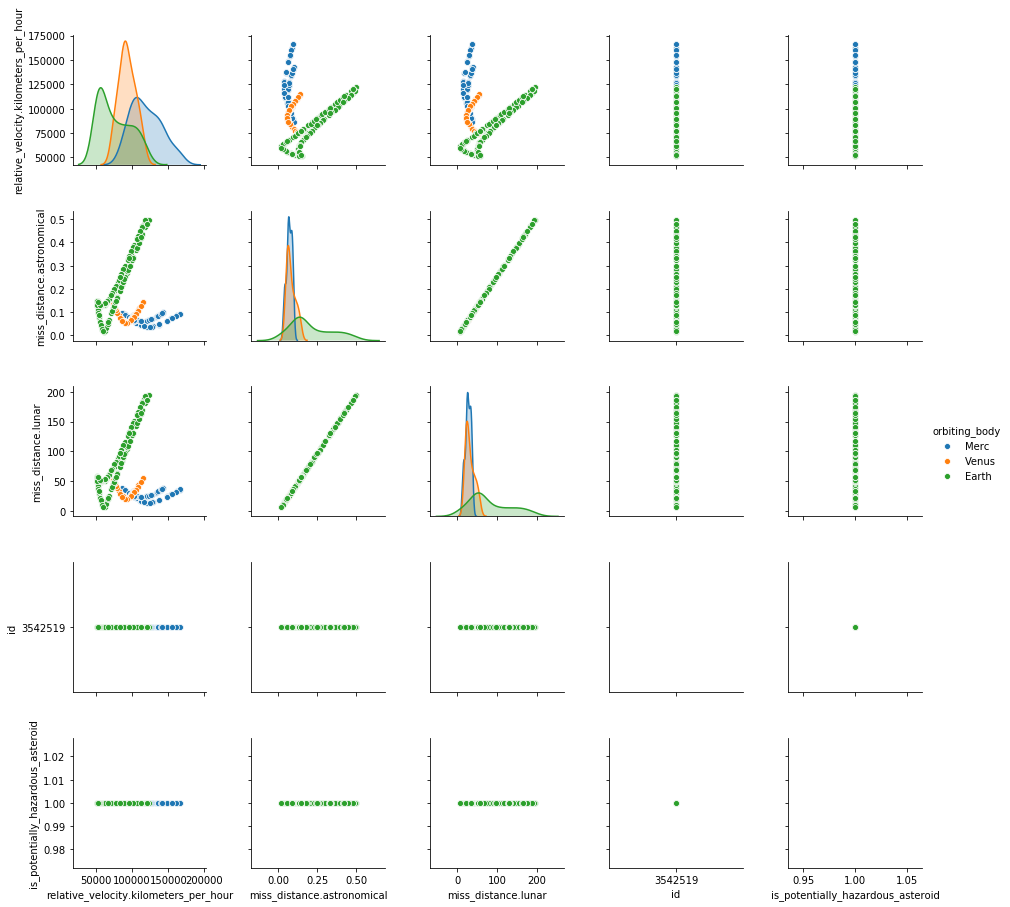

In [572]:
sns.pairplot(nasa_df, hue='orbiting_body');

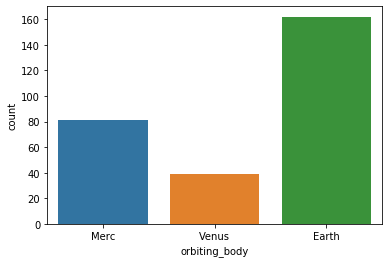

In [573]:
#number of approach dates for each orbiting body
sns.countplot(data=nasa_df, x='orbiting_body')
plt.show();

In [574]:
#filter number of recorded approach dates per year
years = nasa_df.groupby(nasa_df['close_approach_date'].dt.year)['orbiting_body'].count().reset_index(name ='total_amount')
years

,close_approach_date,total_amount
0,1900,3
1,1902,1
2,1903,1
3,1904,1
4,1907,2
...,...,...
207,2192,1
208,2195,1
209,2196,1
210,2197,1


In [575]:
#Filtered out years with more than one orbiting body approach date
filtered_years = years.query('total_amount != 1')
filtered_years

,close_approach_date,total_amount
0,1900,3
4,1907,2
12,1917,2
15,1920,2
18,1925,2
...,...,...
199,2182,2
200,2183,2
204,2188,2
205,2190,2


In [576]:
#changed datatype of close_approach_date to be able to merge
nasa_df['close_approach_date']=nasa_df['close_approach_date'].dt.year
nasa_df

,close_approach_date,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,id,is_potentially_hazardous_asteroid,name
0,1900,Merc,111371.139521,0.044545,17.327968,3542519,True,(2010 PK9)
1,1900,Venus,114401.437153,0.141664,55.107154,3542519,True,(2010 PK9)
2,1900,Earth,85912.343204,0.217728,84.696355,3542519,True,(2010 PK9)
3,1902,Merc,101395.633542,0.086955,33.825596,3542519,True,(2010 PK9)
4,1903,Earth,74541.273456,0.192051,74.707777,3542519,True,(2010 PK9)
...,...,...,...,...,...,...,...,...
277,2192,Earth,77335.249653,0.147028,57.193972,3542519,True,(2010 PK9)
278,2195,Earth,83061.922461,0.251473,97.822878,3542519,True,(2010 PK9)
279,2196,Earth,53670.656602,0.087642,34.092774,3542519,True,(2010 PK9)
280,2197,Venus,86498.614036,0.062700,24.390358,3542519,True,(2010 PK9)


In [577]:
#merge dataframe with filtered years to produce only the years with more than one orbiting body approach date
nasa_df = pd.merge(left=filtered_years, left_on='close_approach_date', right=nasa_df, right_on='close_approach_date')
nasa_df

,close_approach_date,total_amount,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.astronomical,miss_distance.lunar,id,is_potentially_hazardous_asteroid,name
0,1900,3,Merc,111371.139521,0.044545,17.327968,3542519,True,(2010 PK9)
1,1900,3,Venus,114401.437153,0.141664,55.107154,3542519,True,(2010 PK9)
2,1900,3,Earth,85912.343204,0.217728,84.696355,3542519,True,(2010 PK9)
3,1907,2,Venus,109423.351177,0.116965,45.499248,3542519,True,(2010 PK9)
4,1907,2,Earth,110599.525727,0.444180,172.786156,3542519,True,(2010 PK9)
...,...,...,...,...,...,...,...,...,...
130,2188,2,Earth,112666.938709,0.424342,165.069044,3542519,True,(2010 PK9)
131,2190,2,Merc,124129.159289,0.035954,13.985970,3542519,True,(2010 PK9)
132,2190,2,Venus,89925.919536,0.054382,21.154507,3542519,True,(2010 PK9)
133,2191,2,Earth,55305.268376,0.132763,51.644707,3542519,True,(2010 PK9)


In [579]:
#Create variables for the following visuals
twentieth_cent = nasa_df[(nasa_df['close_approach_date'] >= 1900) & (nasa_df['close_approach_date'] <= 1999)]
twenty_first_cent = nasa_df[(nasa_df['close_approach_date'] >= 2000) & (nasa_df['close_approach_date'] <= 2099)]
twenty_second_cent = nasa_df[(nasa_df['close_approach_date'] >= 2100) & (nasa_df['close_approach_date'] <= 2199)]

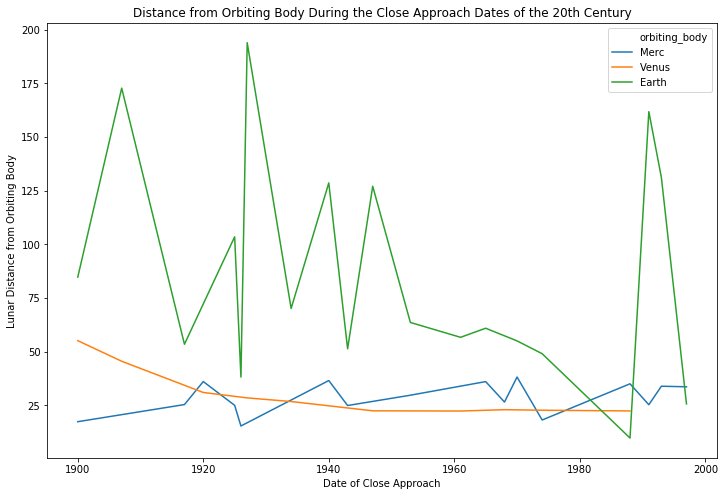

In [580]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twentieth_cent, x='close_approach_date', y='miss_distance.lunar', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.title('Distance from Orbiting Body During the Close Approach Dates of the 20th Century')
plt.xlabel('Date of Close Approach')
plt.ylabel('Lunar Distance from Orbiting Body')
plt.show();

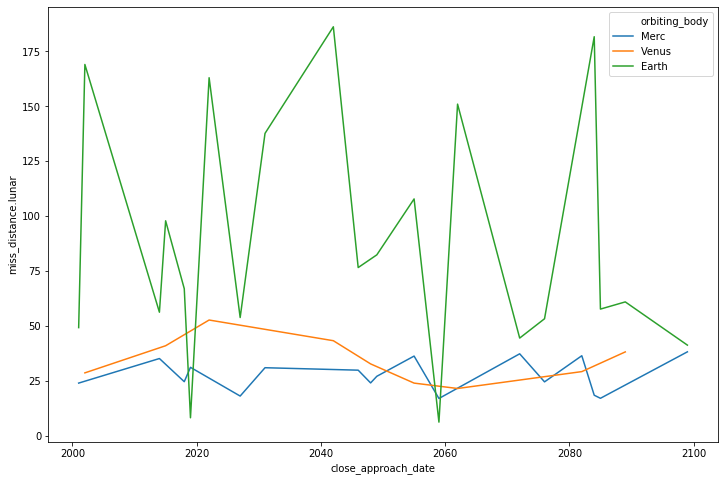

In [581]:
plt.figure(figsize=(12,8))
sns.lineplot(data=twenty_first_cent, x='close_approach_date', y='miss_distance.lunar', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.show();

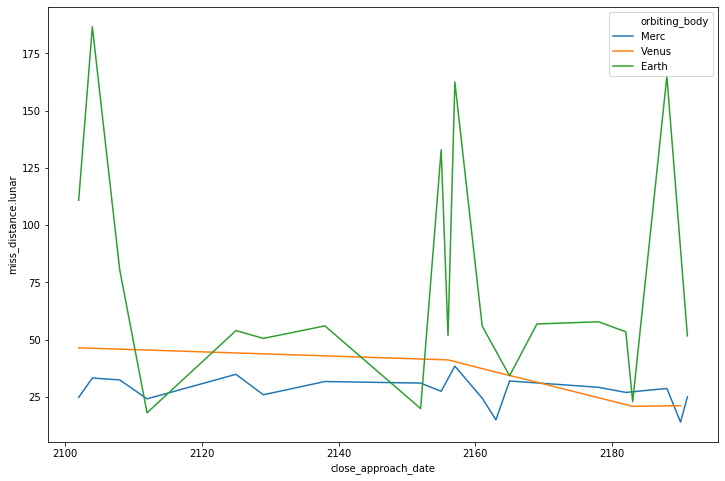

In [582]:
plt.figure(figsize=(12,8))
sns.lineplot(data=twenty_second_cent, x='close_approach_date', y='miss_distance.lunar', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.legend(loc='upper right')
plt.show;

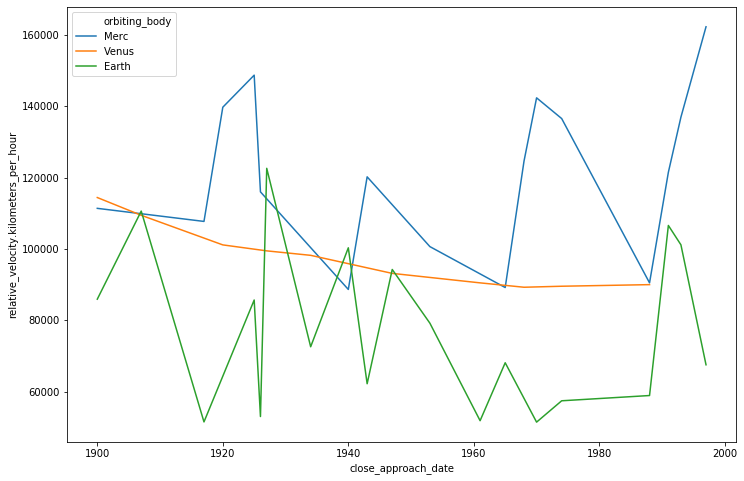

In [583]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twentieth_cent, x='close_approach_date', y='relative_velocity.kilometers_per_hour', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.show();

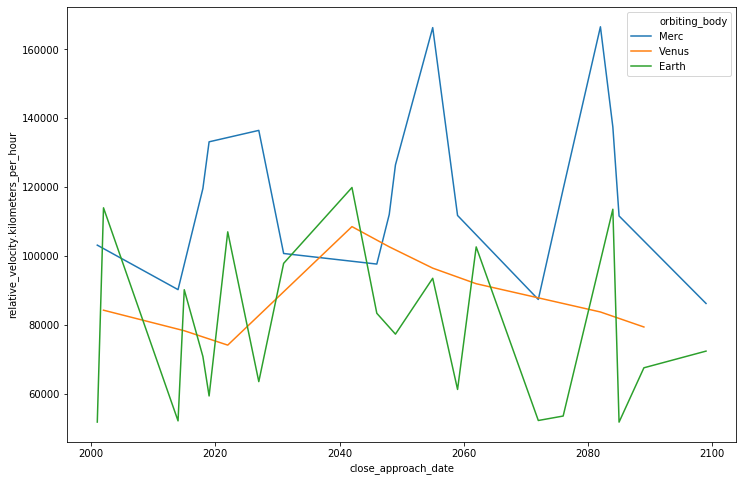

In [584]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twenty_first_cent, x='close_approach_date', y='relative_velocity.kilometers_per_hour', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.show();

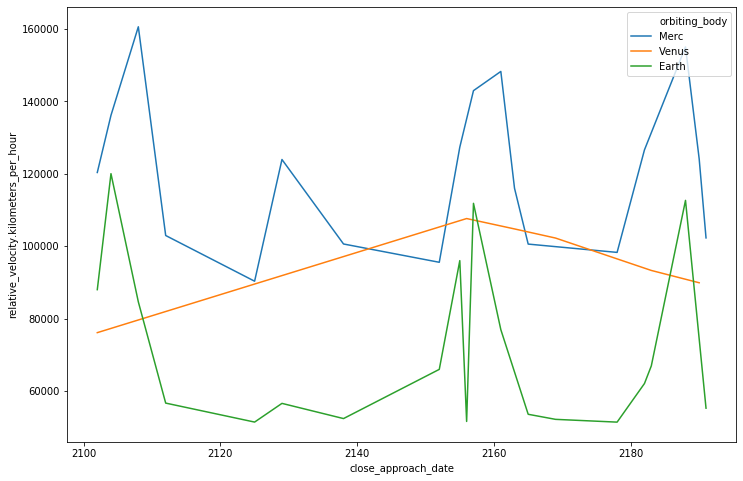

In [585]:
plt.figure(figsize = [12, 8])
sns.lineplot(data= twenty_second_cent, x='close_approach_date', y='relative_velocity.kilometers_per_hour', hue='orbiting_body', hue_order=['Merc', 'Venus', 'Earth'])
plt.legend(loc='upper right')
plt.show();